# Задача 2

<div>
    <img src="exo.png" style="margin:50px;float: left;"/>
</div>

Для заданного эллипса и заданной точки, найдем минимальное растояние от точки до эллипса 

## Задача на картинках!!

<div>
    <img src="ellipse.png" style="margin:50px;float: left;"/>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ellipse_value(a,b,x):
        return b * np.sqrt(1 - (x/a)**2)
def normal_value(a,b,x0,y0,x):
        return ((b**2)*x*y0)/((a**2)*x0 + (b**2 - a**2)*x)
def tangent(a,b,x1,y1,x):
        return (b**2/y1)*(1-x*x1/a**2)

In [3]:
def distance_function(a,b,x0,y0,x):
    return np.sqrt((x-x0)**2 +(b*np.sqrt(1-(x/a)**2)-y0)**2)

In [4]:
# Метод деления
def min_point(a,b,x0,y0,eps=1e-6):
    x_beg = -a
    x_end = a
    iterations = 1000
    while iterations>0:
        x1 = (x_beg+x_end)/2 - eps/2
        x2 = (x_beg+x_end)/2 + eps/2
        f1 = distance_function(a,b,x0,y0,x1)
        f2 = distance_function(a,b,x0,y0,x2)
        if f1<f2 :
            x_end = x2
        else: 
            x_beg = x1
        iterations -= 1
    x_min = (x_beg+x_end)/2  
    return x_min, distance_function(a,b,x0,y0,x_min)
    

In [5]:
min_point(4,2,5,5)

(2.9704738103758297, 4.185540953866526)

In [36]:
min_point(4,2,-4,5)

(-2.558910809975152, 3.7506931768594383)

In [6]:
def distance_graph(a,b,x0,y0,plt=plt):
    xx = np.linspace(-a,a,1000)
    yy = distance_function(a,b,x0,y0,xx)
    x_min, dist_min = min_point(a,b,x0,y0)
    plt.plot(xx,yy)
    plt.scatter(x_min,dist_min,color='g')

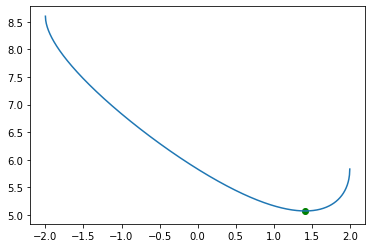

In [8]:
distance_graph(2,2,5,5)

In [10]:
# Рассмотриваем задачу для любой заданной точки на всей плоскости
# Мы используем свойства симметричности эллипса
def min_point_whole_ellipse(a,b,x0,y0):
    x1,_ = min_point(a,b,x0,abs(y0))
    if (y0>=0):
        y1 = ellipse_value(a,b,x1)
    else:
        y1 = (-1.0)*ellipse_value(a,b,x1)
    return x1,y1

In [12]:
min_point_whole_ellipse(2,2,5,2)

(1.8569533817829211, 0.7427813526772012)

In [13]:
min_point_whole_ellipse(2,2,5,-2)

(1.8569533817829211, -0.7427813526772012)

In [31]:
min_point_whole_ellipse(2,2,-5,-2)

(-1.8569533817666715, -0.7427813527178253)

In [16]:
def draw_figure(a,b,x0,y0,plt=plt):
    x1,y1 = min_point_whole_ellipse(a,b,x0,y0)
    
    fig,ax = plt.subplots(figsize=(6,6))
    axlim = np.max([a,b,abs(x0),abs(y0)])+0.2
    ax.set_xlim(-axlim,axlim)
    ax.set_ylim(-axlim,axlim)
    
    ell_xx = np.linspace(-a,a,200)
    ax.plot(ell_xx,ellipse_value(a,b,ell_xx),'b-')
    ax.plot(ell_xx,(-1.0)*ellipse_value(a,b,ell_xx),'b-')
    
    xx = np.linspace(-axlim,axlim,200)
    ax.scatter([x0,x1],[y0,y1],color='k')
    ax.plot([x0,x1],[y0,y1],color='green')
    if y1!=0:
        ax.plot(xx,tangent(a,b,x1,y1,xx),color='orange')
    else:
        ax.plot([x1,x1],[-axlim+0.4, axlim-0.4],color='orange')

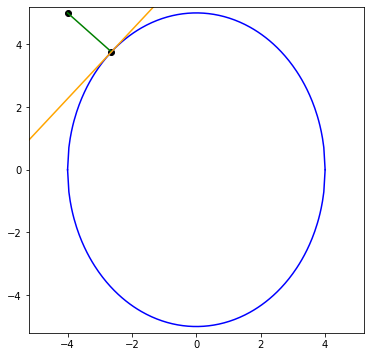

In [17]:
draw_figure(4,5,-4,5)

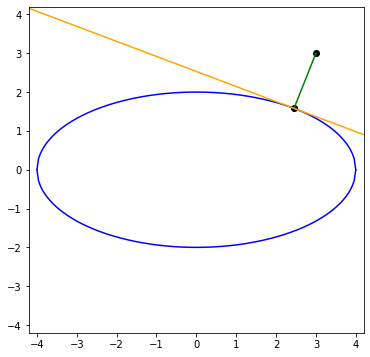

In [18]:
draw_figure(4,2,3,3)

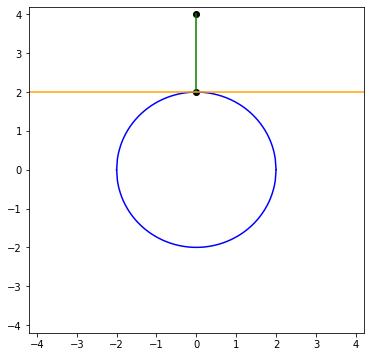

In [19]:
draw_figure(2,2,0,4)

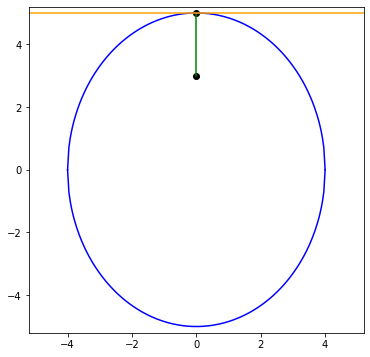

In [20]:
draw_figure(4,5,0,3)

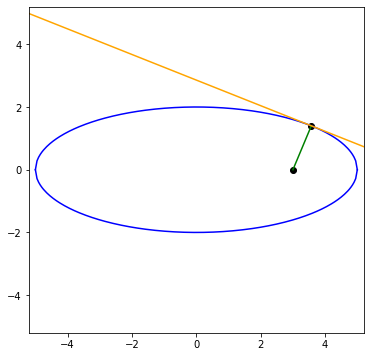

In [21]:
draw_figure(5,2,3,0)

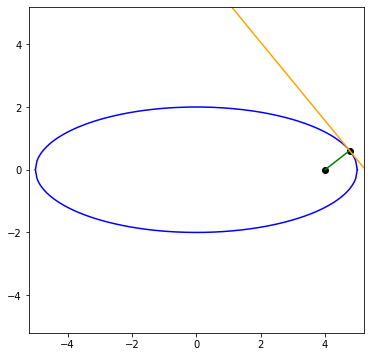

In [22]:
draw_figure(5,2,4,0)

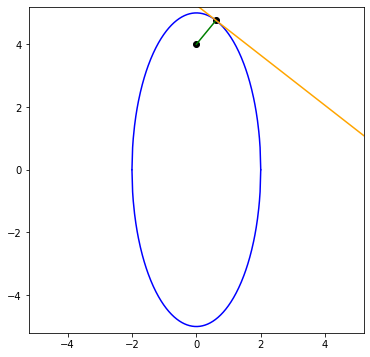

In [23]:
draw_figure(2,5,0,4)

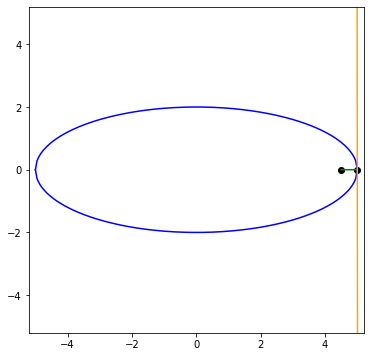

In [24]:
draw_figure(5,2,4.5,0)

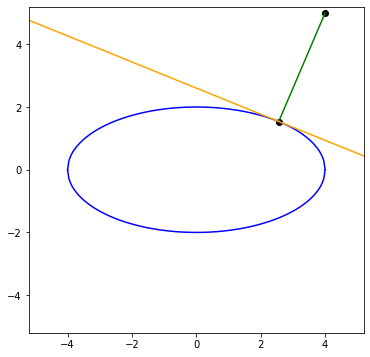

In [25]:
draw_figure(4,2,4,5)

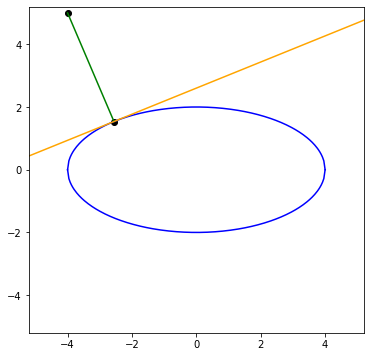

In [26]:
draw_figure(4,2,-4,5)

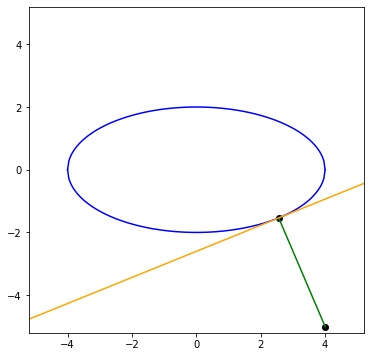

In [27]:
draw_figure(4,2,4,-5)

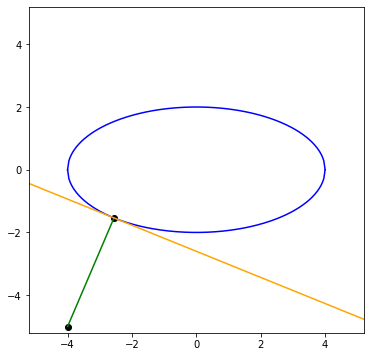

In [28]:
draw_figure(4,2,-4,-5)

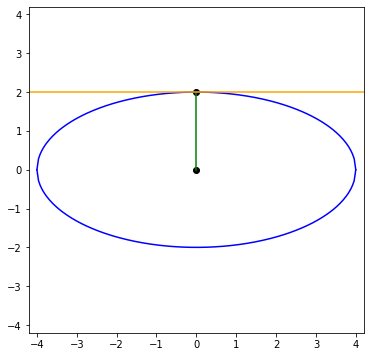

In [29]:
draw_figure(4,2,0,0)

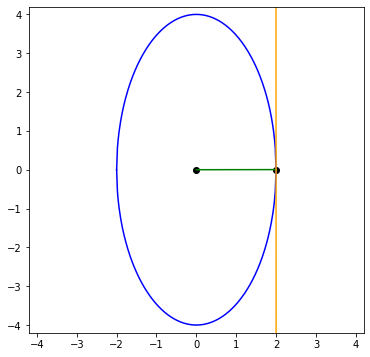

In [30]:
draw_figure(2,4,0,0)

# ЗАДАЧА 2: Минимальное расстояние от точки $(x_0, y_0)$ до любого эллипса с центром в $(\alpha,\beta)$

In [42]:
def distance_to_real_ellipse(a,b,alpha,beta,x0,y0):
    _, dist = min_point(a,b,x0-alpha,abs(y0-beta))
    return dist

In [44]:
# Результат должен быть 2 так как центр взяли и смотрим на ответ....... всё круто!!
distance_to_real_ellipse(4,2,4,5,4,5)

2.0

In [45]:
distance_to_real_ellipse(4,2,4,5,0,0)

3.7506931768594383

In [46]:
distance_to_real_ellipse(4,2,4,5,8,5) # Точка находится на эллипсе

0.0010000000942056847

# Задача 3: Находим точку заданной прямой $y = m*x+k$ , минимизирующую сумму расстояний до $N$ заданных эллипсов.

In [47]:
def straight_line(m,k,x):
    return m*x+k

In [48]:
def check_parameters(a,b,alpha,beta):
    N = len(a)
    return np.all([len(b)==N,len(alpha)==N,len(beta)==N,np.all(np.array(a)>0),np.all(np.array(a)>0)])

In [49]:
check_parameters([1,2],[3,4],[5,-6],[7,8])

True

In [50]:
def sum_of_distances_from_point_to_ellipses(a,b,alpha,beta,x0,y0):
    sum_distance = 0
    N = len(a)
    for i in range(N):
        dist_i = distance_to_real_ellipse(a[i],b[i],alpha[i],beta[i],x0,y0)
        sum_distance += dist_i
    return sum_distance

In [51]:
sum_of_distances_from_point_to_ellipses([2,4,7],[1,3,8],[4,-2,0],[2,-1,5],10,10)

25.335104771270817

In [52]:
def sum_distances_plot(a,b,alpha,beta,m,k,plt=plt):
    x_min = min(np.array(alpha)-np.array(a))-10
    x_max = max(np.array(alpha)+np.array(a))+10
    
    xx = np.linspace(x_min,x_max,500)
    yy = straight_line(m,k,xx)
    dist = []
    for j in range(len(xx)):
        dist.append(sum_of_distances_from_point_to_ellipses(a,b,alpha,beta,xx[j],yy[j])) 
    
    plt.plot(xx,dist)

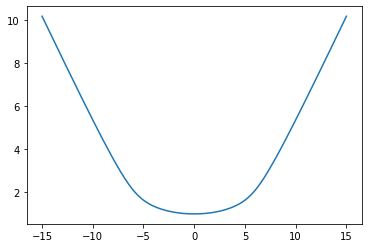

In [53]:
sum_distances_plot([5],[1],[0],[2],0,0)

In [54]:
def newton_method(f,x0=0,eps=1e-6):
    x = x0
    h = 0.0001
    
    fx = f(x)
    fh = f(x+h)
    f2h = f(x+2*h)
    df = ( fh - fx)/h
    d2f = (f2h+fx-2*fh) / h**2
    
    while np.abs(df)> eps :
        x = x - df/d2f
        
        fx = f(x)
        fh = f(x+h)
        f2h = f(x+2*h)
        df = ( fh - fx)/h
        d2f = (f2h+fx-2*fh) / h**2
    
    return x,fx

In [56]:
def test_f(x):
    return x**2 + x +1

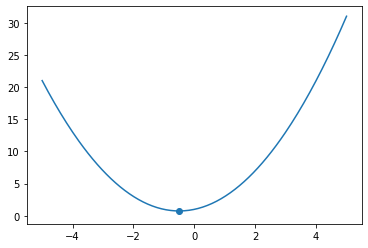

In [58]:
xx_test = np.linspace(-5,5,200)
yy_test = test_f(xx_test)

xx_min, ff_min = newton_method(test_f)
plt.plot(xx_test,yy_test)
plt.scatter(xx_min,ff_min)

In [61]:
# Область где будем искать точку
def minimal_sum_of_distances_to_ellipses(a,b,alpha,beta,m,k,vertical=False):
    
    def dist(x):
        y = straight_line(m,k,x)
        return sum_of_distances_from_point_to_ellipses(a,b,alpha,beta,x,y)
    
    if check_parameters(a,b,alpha,beta):
        if (not vertical):
            x_min = min(np.array(alpha)-np.array(a))
            x_max = max(np.array(alpha)+np.array(a))
            
            x_init = (x_max + x_min)/2
            
            x_opt, min_dist = newton_method(dist,x0=x_init)
            y_opt = straight_line(m,k,x_opt)
        else:
            a,b = b,a
            alpha,beta = beta,alpha
            m = 0
            y_min = min(np.array(alpha)-np.array(a))
            y_max = max(np.array(alpha)+np.array(a))
            
            y_init = (y_max + y_min)/2
            
            y_opt, min_dist = newton_method(dist,x0=y_init)
            x_opt = k
            
        return x_opt,y_opt,min_dist
    else:
               print("Ellipses' parameters are not correct! \n The condition a > 0 and b > 0 is mandatory! \n And the parameters must be arrays of equal length.")

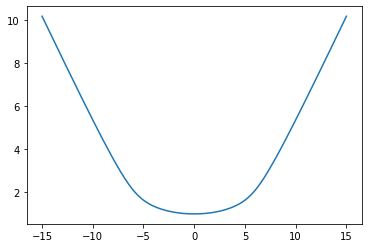

In [53]:
sum_distances_plot([5],[1],[0],[2],0,0)

In [62]:
minimal_sum_of_distances_to_ellipses([5],[1],[0],[2],0,0)

(-5e-05, 0.0, 1.0000000000480769)

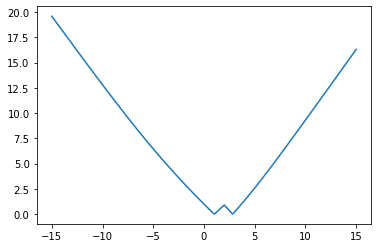

In [64]:
sum_distances_plot([5],[1],[0],[2],1,0)

In [63]:
minimal_sum_of_distances_to_ellipses([5],[1],[0],[2],1,0)

C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


(inf, inf, inf)

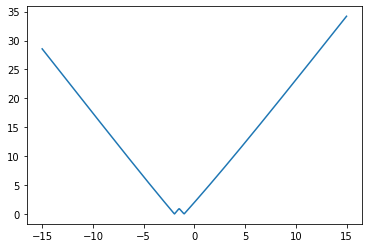

In [65]:
sum_distances_plot([5],[1],[0],[2],2,5)

In [70]:
minimal_sum_of_distances_to_ellipses([5],[1],[0],[2],2,5)

C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


(-inf, -inf, inf)

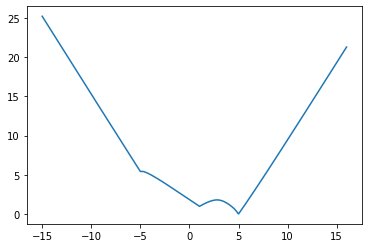

In [66]:
sum_distances_plot([5,3],[1,4],[0,3],[2,5],0,2)

In [71]:
minimal_sum_of_distances_to_ellipses([5,3],[1,4],[0,3],[2,5],0,2)

C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


(inf, nan, nan)

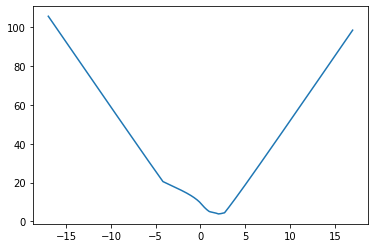

In [67]:
sum_distances_plot([2,4,7],[1,3,8],[4,-2,0],[2,-1,5],-2,3)

In [72]:
minimal_sum_of_distances_to_ellipses([2,4,7],[1,3,8],[4,-2,0],[2,-1,5],-2,3)

C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


(inf, -inf, inf)

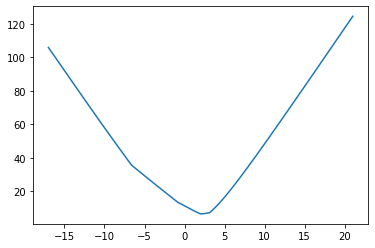

In [68]:
sum_distances_plot([2,4,7,4,5],[1,3,8,2,5],[4,-2,0,-3,6],[2,-1,5,-4,2],-1,1)

In [73]:
minimal_sum_of_distances_to_ellipses([2,4,7,4,5],[1,3,8,2,5],[4,-2,0,-3,6],[2,-1,5,-4,2],-1,1)

C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


(inf, -inf, inf)

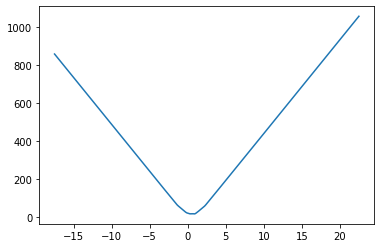

In [69]:
sum_distances_plot([2,4,7,4,5,2,10],[1,3,8,2,5,4,9],[4,-2,0,-3,6,0,2.5],[2,-1,5,-4,2,0,-3.5],-7,3.4)

In [74]:
minimal_sum_of_distances_to_ellipses([2,4,7,4,5,2,10],[1,3,8,2,5,4,9],[4,-2,0,-3,6,0,2.5],[2,-1,5,-4,2,0,-3.5],-7,3.4)

KeyboardInterrupt: 

Метод Ньютона не справился, непонятно почему.... Поэтому я сам разроботал свой собственный метод оптимизации унимодальных функций на всем множестве вещественных чисел (keyela_method) Этот метод не использует никаких производных !! Он находит направление спуска в любой заданной точке, дальше находит интервал, которому принадлежит точка минимума и наконец находит эту точку минимума (через метод деления отрезка)

In [75]:
def keyela_method(f,x0,step,eps=1e-6):
    def find_direction(x):
        x_l = x-eps/2
        x_r = x+eps/2
        fl = f(x_l)
        fr = f(x_r)
        if fl < fr:
            direction = -1
        else:
            direction = 1
        return direction
    
    x1=x0
    direct = find_direction(x1)
    
    x_tmp =  x1 - step if direct == -1 else x1 + step
    new_direction = find_direction(x_tmp)
    
    while new_direction == direct:
        x1 = x_tmp
        x_tmp =  x1 - step if direct == -1 else x1 + step
        new_direction = find_direction(x_tmp)
    x2 = x_tmp
    
    x_beg = x1
    x_end = x2
    iterations = 1000
    while iterations>0:
        x1 = (x_beg+x_end)/2 - eps/2
        x2 = (x_beg+x_end)/2 + eps/2
        f1 = f(x1)
        f2 = f(x2)
        
        if f1<f2 :
            x_end = x2
        else: 
            x_beg = x1
        iterations -= 1
    x_min = (x_beg+x_end)/2  
    return x_min, f(x_min)
    

In [76]:
def test_function(x):
    return x**2

In [77]:
keyela_method(test_function,x0=-5,step=1e-5)

(4.999798796490615e-07, 2.4997988005389e-13)

In [78]:
keyela_method(test_function,x0=0,step=1e-5)

(5.000000000000001e-07, 2.500000000000001e-13)

In [79]:
keyela_method(test_function,x0=10,step=1e-5)

(-1.0499790591064256e-05, 1.1024560245620148e-10)

In [80]:
keyela_method(test_function,x0=1,step=1e-3)

(0.0010004999999991188, 1.0010002499982368e-06)

Буду использовать этот метод вместо метода Ньютона

In [81]:
# Область где будем искать точку
def keyela_minimisation(a,b,alpha,beta,m,k,vertical=False):
    
    def dist(x):
        y = straight_line(m,k,x)
        return sum_of_distances_from_point_to_ellipses(a,b,alpha,beta,x,y)
    
    if check_parameters(a,b,alpha,beta):
        if (not vertical):
            x_min = min(np.array(alpha)-np.array(a))
            x_max = max(np.array(alpha)+np.array(a))
            
            x_init = (x_max + x_min)/2
            
            x_opt, min_dist = keyela_method(dist,x0=x_init,step=1e-3)
            y_opt = straight_line(m,k,x_opt)
        else:
            a,b = b,a
            alpha,beta = beta,alpha
            m = 0
            y_min = min(np.array(alpha)-np.array(a))
            y_max = max(np.array(alpha)+np.array(a))
            
            y_init = (y_max + y_min)/2
            
            y_opt, min_dist = keyela_method(dist,x0=y_init,step=1e-3)
            x_opt = k
            
        return x_opt,y_opt,min_dist
    else:
               print("Ellipses' parameters are not correct! \n The condition a > 0 and b > 0 is mandatory! \n And the parameters must be arrays of equal length.")

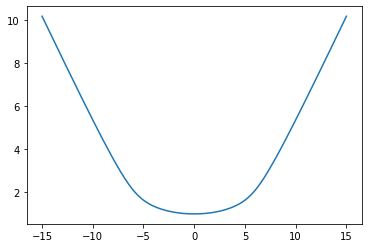

In [53]:
sum_distances_plot([5],[1],[0],[2],0,0)

In [82]:
keyela_minimisation([5],[1],[0],[2],0,0)

(5.000000000000001e-07, 0.0, 1.0000000000000049)

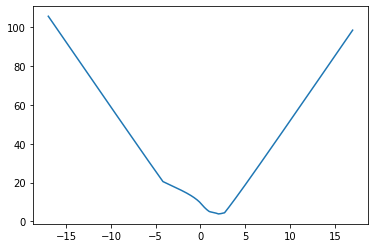

In [67]:
sum_distances_plot([2,4,7],[1,3,8],[4,-2,0],[2,-1,5],-2,3)

In [83]:
keyela_minimisation([2,4,7],[1,3,8],[4,-2,0],[2,-1,5],-2,3)

(2.000697660739857, -1.0013953214797144, 3.8887901946952903)

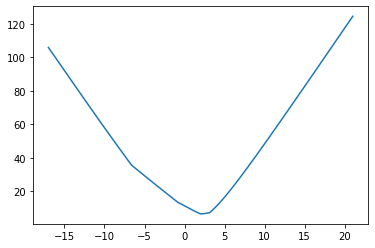

In [68]:
sum_distances_plot([2,4,7,4,5],[1,3,8,2,5],[4,-2,0,-3,6],[2,-1,5,-4,2],-1,1)

In [84]:
keyela_minimisation([2,4,7,4,5],[1,3,8,2,5],[4,-2,0,-3,6],[2,-1,5,-4,2],-1,1)

(2.0011277200888005, -1.0011277200888005, 6.408564160551309)

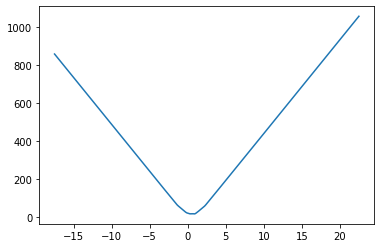

In [69]:
sum_distances_plot([2,4,7,4,5,2,10],[1,3,8,2,5,4,9],[4,-2,0,-3,6,0,2.5],[2,-1,5,-4,2,0,-3.5],-7,3.4)

In [85]:
keyela_minimisation([2,4,7,4,5,2,10],[1,3,8,2,5,4,9],[4,-2,0,-3,6,0,2.5],[2,-1,5,-4,2,0,-3.5],-7,3.4)

(0.9039995000001653, -2.9279965000011567, 15.449211025061249)

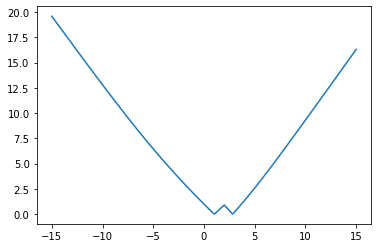

In [64]:
sum_distances_plot([5],[1],[0],[2],1,0)

In [86]:
keyela_minimisation([5],[1],[0],[2],1,0)

(1.0210738923416542, 1.0210738923416542, 5.88418203051333e-15)

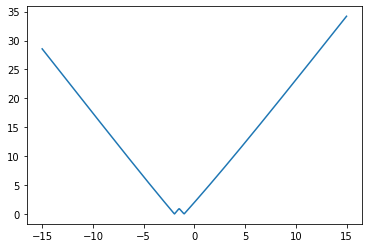

In [65]:
sum_distances_plot([5],[1],[0],[2],2,5)

In [87]:
keyela_minimisation([5],[1],[0],[2],2,5)

(-1.0110004999999993, 2.9779990000000014, 0.0013440838676586507)

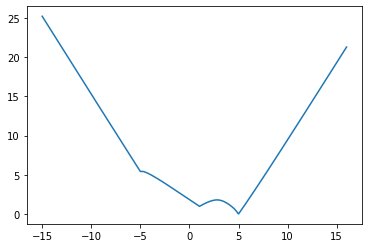

In [66]:
sum_distances_plot([5,3],[1,4],[0,3],[2,5],0,2)

In [88]:
keyela_minimisation([5,3],[1,4],[0,3],[2,5],0,2)

(1.015686545095705, 2.0, 0.9782719002105793)